In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *
import sklearn
print(sklearn.__version__)

/Users/richardlee/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/pycaret/loggers/mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


0.23.2


In [2]:
data = get_data('df_final_56')
data = data.drop(columns = ["Unnamed: 0","IZ","EP","patient","Channels"])
#data = data[["outcome","InDegree", "OutDegree","EV","Closeness"]]

data.head()

,Unnamed: 0,Channels,outcome,IZ,EP,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,N2RespSDV,P2RespAvg,P2RespSDV,N1StimAvg,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV,patient,InDegree,OutDegree,EV,Closeness
0,0,LA1_LA2,1.0,0.0,0.0,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.290183,2.011706,3.724259,3.460362,2.796966,3.000218,PY21N008,0.000000,0.071429,4.993936e-14,0.000000
1,1,LA9_LA10,0.0,1.0,0.0,0.000000,0.193548,1.808045,1.676081,2.493333,2.341456,1.630795,1.577302,5.557560,9.957544,5.060794,6.246739,4.478926,6.889325,PY21N008,0.000000,0.214286,4.993936e-14,0.000000
2,2,LAH1_LAH2,1.0,1.0,0.0,0.064516,0.193548,7.116911,19.154270,4.252294,5.048311,3.042083,4.170923,6.103548,14.745868,3.809967,3.367630,1.821021,1.867067,PY21N008,0.071429,0.214286,7.960633e-04,0.174603
3,3,LAH8_LAH9,0.0,0.0,0.0,0.290323,0.096774,4.306443,3.856300,4.059026,4.970039,2.876449,3.447806,1.939979,2.173960,1.695722,1.598789,1.574253,2.044144,PY21N008,0.321429,0.107143,1.590588e-01,0.480159
4,4,LPH1_LPH2,0.0,1.0,0.0,0.096774,0.258065,5.792531,15.863221,3.143365,3.299196,2.067806,3.085698,5.036293,7.764073,3.585250,3.693649,3.242192,3.639533,PY21N008,0.107143,0.285714,4.743272e-03,0.218807


,outcome,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,N2RespSDV,P2RespAvg,P2RespSDV,N1StimAvg,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV,InDegree,OutDegree,EV,Closeness
0,1.0,0.000000,0.064516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.290183,2.011706,3.724259,3.460362,2.796966,3.000218,0.000000,0.071429,4.993936e-14,0.000000
1,0.0,0.000000,0.193548,1.808045,1.676081,2.493333,2.341456,1.630795,1.577302,5.557560,9.957544,5.060794,6.246739,4.478926,6.889325,0.000000,0.214286,4.993936e-14,0.000000
2,1.0,0.064516,0.193548,7.116911,19.154270,4.252294,5.048311,3.042083,4.170923,6.103548,14.745868,3.809967,3.367630,1.821021,1.867067,0.071429,0.214286,7.960633e-04,0.174603
3,0.0,0.290323,0.096774,4.306443,3.856300,4.059026,4.970039,2.876449,3.447806,1.939979,2.173960,1.695722,1.598789,1.574253,2.044144,0.321429,0.107143,1.590588e-01,0.480159
4,0.0,0.096774,0.258065,5.792531,15.863221,3.143365,3.299196,2.067806,3.085698,5.036293,7.764073,3.585250,3.693649,3.242192,3.639533,0.107143,0.285714,4.743272e-03,0.218807


In [3]:
s = setup(data, target = 'outcome',session_id = 2,fold_shuffle=True)

,Description,Value
0,session_id,2
1,Target,outcome
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(315, 19)"
5,Missing Values,False
6,Numeric Features,18
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best = compare_models()





,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8636,0.7603,0.1250,0.2667,0.1567,0.1284,0.1453,0.1160
dummy,Dummy Classifier,0.8591,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0040
ridge,Ridge Classifier,0.8500,0.0000,0.0000,0.0000,0.0000,-0.0152,-0.0190,0.0060
rf,Random Forest Classifier,0.8500,0.7383,0.1167,0.2000,0.1467,0.0981,0.0994,0.1080
svm,SVM - Linear Kernel,0.8455,0.0000,0.1250,0.2500,0.1536,0.1091,0.1251,0.0070
lr,Logistic Regression,0.8409,0.6289,0.0000,0.0000,0.0000,-0.0298,-0.0363,0.3280
lda,Linear Discriminant Analysis,0.8409,0.6222,0.0000,0.0000,0.0000,-0.0274,-0.0315,0.0070
lightgbm,Light Gradient Boosting Machine,0.8273,0.6827,0.0833,0.1000,0.0905,0.0294,0.0271,0.0150
knn,K Neighbors Classifier,0.8227,0.5957,0.1167,0.2000,0.1467,0.0665,0.0678,0.1730
gbc,Gradient Boosting Classifier,0.8091,0.6355,0.0917,0.0917,0.0917,0.0113,0.0083,0.0220


In [5]:
rf = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.8125,0.5000,1.0000,0.6667,0.6207,0.6708
1,0.8182,0.8070,0.0000,0.0000,0.0000,-0.0732,-0.0867
2,0.8182,0.3860,0.0000,0.0000,0.0000,-0.0732,-0.0867
3,0.8636,0.9123,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8182,0.4211,0.0000,0.0000,0.0000,-0.0732,-0.0867
5,0.8636,0.8772,0.3333,0.5000,0.4000,0.3265,0.3351
6,0.8182,0.8158,0.0000,0.0000,0.0000,-0.0732,-0.0867
7,0.8636,0.8421,0.3333,0.5000,0.4000,0.3265,0.3351
8,0.8636,0.8070,0.0000,0.0000,0.0000,0.0000,0.0000


In [6]:
tuned_rf = tune_model(rf,optimize = 'AUC')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.7361,0.5000,0.6667,0.5714,0.4923,0.4995
1,0.8182,0.8421,0.3333,0.3333,0.3333,0.2281,0.2281
2,0.8182,0.4035,0.0000,0.0000,0.0000,-0.0732,-0.0867
3,0.8636,0.9825,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8182,0.5439,0.3333,0.3333,0.3333,0.2281,0.2281
5,0.8636,0.9298,0.3333,0.5000,0.4000,0.3265,0.3351
6,0.8636,0.8772,0.3333,0.5000,0.4000,0.3265,0.3351
7,0.8636,0.6491,0.3333,0.5000,0.4000,0.3265,0.3351
8,0.8182,0.8246,0.0000,0.0000,0.0000,-0.0732,-0.0867


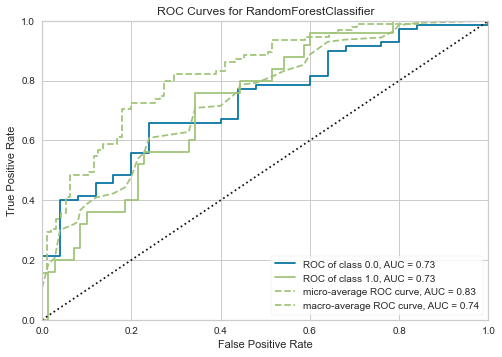

In [7]:
plot_model(tuned_rf, plot = 'auc')


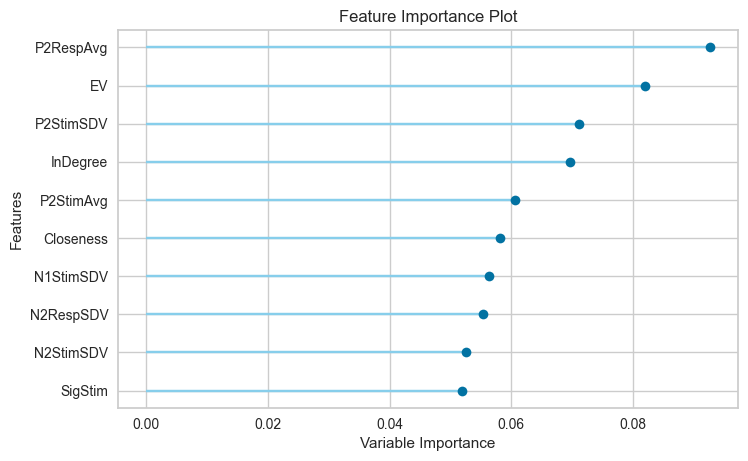

In [8]:
plot_model(tuned_rf, plot='feature')

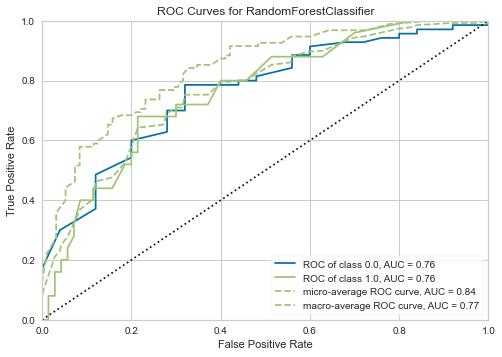

In [9]:
plot_model(rf, plot = 'auc')


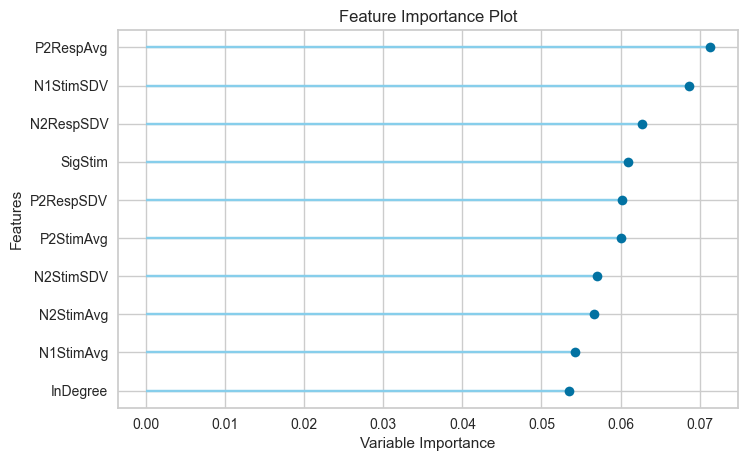

In [10]:
plot_model(rf, plot='feature')

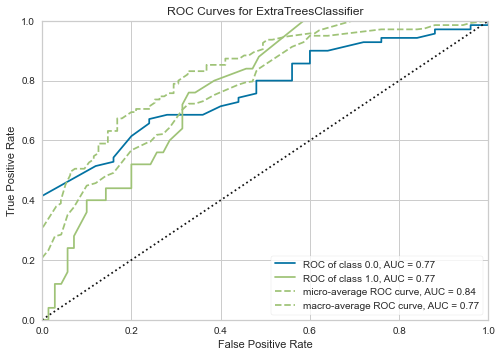

In [11]:
plot_model(best, plot = 'auc')


In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.8125,0.5000,1.0000,0.6667,0.6207,0.6708
1,0.8182,0.8070,0.0000,0.0000,0.0000,-0.0732,-0.0867
2,0.8182,0.3860,0.0000,0.0000,0.0000,-0.0732,-0.0867
3,0.8636,0.9123,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8182,0.4211,0.0000,0.0000,0.0000,-0.0732,-0.0867
5,0.8636,0.8772,0.3333,0.5000,0.4000,0.3265,0.3351
6,0.8182,0.8158,0.0000,0.0000,0.0000,-0.0732,-0.0867
7,0.8636,0.8421,0.3333,0.5000,0.4000,0.3265,0.3351
8,0.8636,0.8070,0.0000,0.0000,0.0000,0.0000,0.0000


In [13]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
rf.get_params()